## LEGO BRICKS CLASSIFIER

In [27]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing import image
import shutil, os
from os import listdir
!pip install split-folders
import splitfolders
%matplotlib inline

In [2]:
# Mount Google Drive on Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read in the datasets using Pandas package
train = pd.read_csv("/content/drive/MyDrive/Dataset/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/Dataset/Test.csv")
sample = pd.read_csv("/content/drive/MyDrive/Dataset/sample_submission.csv")

In [4]:
# Display the first 5 rows in the training set
train.head()

,name,category
0,1.png,9
1,2.png,3
2,3.png,9
3,4.png,8
4,5.png,13


In [5]:
# Display the first 5 rows in the test set
test.head()

,name
0,4466.png
1,4467.png
2,4468.png
3,4469.png
4,4470.png


In [6]:
# Display the first 5 rows in the sample submission file
sample.head()

,name,category
0,4466.png,1
1,4467.png,15
2,4468.png,4
3,4469.png,8


In [7]:
# Make the data folder your working directory
cd "/content/drive/MyDrive/Dataset"

/content/drive/MyDrive/Dataset


In [ ]:
# Create a new directory to enhance organization of the training and validation data
labels = train.sort_values('category')

class_names = list(labels.category.unique())

for i in class_names:
    os.makedirs(os.path.join('new_data', str(i)))

In [9]:
# Iterate through the label list
for c in class_names:
    for i in list(labels[labels['category']==c]['name']):

        #create path to the image 
        get_image = os.path.join('train', str(i))

        #If image does not exist already in the new folder, create one        
        if not os.path.exists('new_data/'+str(c)+ str(i)):

          # move the image
          move_image_to_cat = shutil.move(get_image,'new_data/'+str(c))

In [10]:
# Organize the training and validation data by making a 80:20 split
input_folder = '/content/drive/MyDrive/Dataset/new_data/'
output = '/content/drive/MyDrive/Dataset/data/'

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2))

In [11]:
# Initialize image dimensions
img_width, img_height = 150, 150

# Create variables for the file paths
train_data_dir = '/content/drive/MyDrive/Dataset/data/train'
validation_data_dir = '/content/drive/MyDrive/Dataset/data/val'
test_data_dir = '/content/drive/MyDrive/Dataset/test'

In [12]:
# Set some parameters
batch_size = 16
nb_train_samples = 3572
nb_validation_samples = 893
epochs = 20
input_shape = (img_width, img_height, 3)

In [13]:
# Augmentation configuration and rescaling for train set
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# Rescaling for validation set
val_datagen = ImageDataGenerator(rescale=1. / 255)
# Rescaling for test set
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [14]:
# Generate a data generator from image files in a directory using the flow_from_directory() method in ImageDataGenerator class

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height), shuffle = False,
                                                        batch_size=batch_size)

Found 3564 images belonging to 16 classes.
Found 901 images belonging to 16 classes.
Found 0 images belonging to 0 classes.


There are no classes yet in the test folder since that's what we want to predict.

In [15]:
# Build an image classifier model, a sequential CNN architecture with relu as hidden neurons activation function and
# softmax as output neuron activation function.

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(Activation('softmax'))

In [16]:
# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[tf.keras.metrics.FalseNegatives()])

In [17]:
# Model Training

result = model.fit(train_generator, steps_per_epoch=nb_train_samples // batch_size, epochs=epochs, validation_data=validation_generator,
                   validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
223/223 [==============================] - 804s 4s/step - loss: 2.1977 - false_negatives: 3303.0000 - val_loss: 1.3135 - val_false_negatives: 635.0000
Epoch 2/20
223/223 [==============================] - 30s 134ms/step - loss: 1.7451 - false_negatives: 2933.0000 - val_loss: 0.9874 - val_false_negatives: 518.0000
Epoch 3/20
223/223 [==============================] - 30s 136ms/step - loss: 1.5922 - false_negatives: 2765.0000 - val_loss: 0.9456 - val_false_negatives: 501.0000
Epoch 4/20
223/223 [==============================] - 29s 129ms/step - loss: 1.4907 - false_negatives: 2623.0000 - val_loss: 0.8408 - val_false_negatives: 443.0000
Epoch 5/20
223/223 [==============================] - 31s 139ms/step - loss: 1.3631 - false_negatives: 2482.0000 - val_loss: 0.7579 - val_false_negatives: 393.0000
Epoch 6/20
223/223 [==============================] - 30s 136ms/step - loss: 1.3369 - false_negatives: 2417.0000 - val_loss: 0.6323 - val_false_negatives: 320.0000
Epoch 7/20
223/223

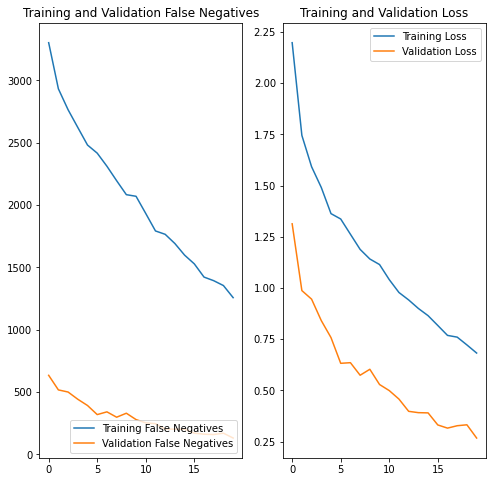

In [23]:
# Generate the plots of the losses and the false negatives
loss = result.history['loss']
val_loss = result.history['val_loss']
fn = result.history['false_negatives']
val_fn = result.history['val_false_negatives']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, fn, label='Training False Negatives')
plt.plot(epochs_range, val_fn, label='Validation False Negatives')
plt.legend(loc='lower right')
plt.title('Training and Validation False Negatives')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
# Save the model
model.save('model.h5')

In [29]:
# Load the exported model
loaded_model = tf.keras.models.load_model('model.h5')
loaded_model.layers[0].input_shape

(None, 150, 150, 3)

In [28]:
# Read in the test files
batch_holder = np.zeros((1914, 150, 150, 3))
img_dir='/content/drive/MyDrive/Dataset/test'
for i,img in enumerate(os.listdir(img_dir)):
  img = image.load_img(os.path.join(img_dir,img), target_size=(img_width, img_height))
  batch_holder[i, :] = img


In [34]:
# Predict the label of the test_images
result=loaded_model.predict(batch_holder)
pred = np.argmax(result,axis=1)

In [38]:
# Create a new dataframe and parse the names of pictures in the test file
submit = test[['name']]

In [40]:
# Parse the prediction to Category column in the new submit dataframe
submit['category'] = pred

In [41]:
# Check the first 5 predictions
submit.head()

,name,category
0,4466.png,3
1,4467.png,4
2,4468.png,8
3,4469.png,13
4,4470.png,0


In [42]:
# Verify the shape of submission dataframe
submit.shape

(1914, 2)

In [43]:
# Export submission dataframe to CSV
submit.to_csv('Submission.csv', index = False)